In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
import shap
from sklearn.model_selection import train_test_split

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#SVM
from sklearn.svm import SVC

#XGBoost
from xgboost import XGBClassifier

In [2]:
SMdata = pd.read_csv('SMData.csv')
SMdata = SMdata.drop(columns=['Unnamed: 0'])
SMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    Debt ratio %                                             13198 non-null  float64
 1    Borrowing dependency                                     13198 non-null  float64
 2    Liability to Equity                                      13198 non-null  float64
 3    Net Income to Stockholder's Equity                       13198 non-null  float64
 4    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 5    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 6    Net worth/Assets                                         13198 non-null  float64
 7    ROA(B) before interest and depreciation after tax        13198 non-null  float64
 8    ROA(A) before i

In [3]:
df = SMdata
y = pd.DataFrame(SMdata['Bankrupt?'])
x = df.drop(['Bankrupt?'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2023)

In [4]:
#KNN
KNNclf = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
KNNclf.fit(x_train, y_train.values.ravel())
y_pred_KNN = KNNclf.predict(x_test)

#Random Forest
RFclf = RandomForestClassifier(n_estimators = 100)  
RFclf.fit(x_train, y_train.values.ravel())
y_pred_RF = RFclf.predict(x_test)

#SVM
SVCModel= SVC()
SVCModel.fit(x_train, y_train.values.ravel())
y_pred_SVM = SVCModel.predict(x_test)

#XGB
XGBModel = XGBClassifier()
XGBModel.fit(x_train, y_train.values.ravel())
y_pred_XGB = XGBModel.predict(x_test)

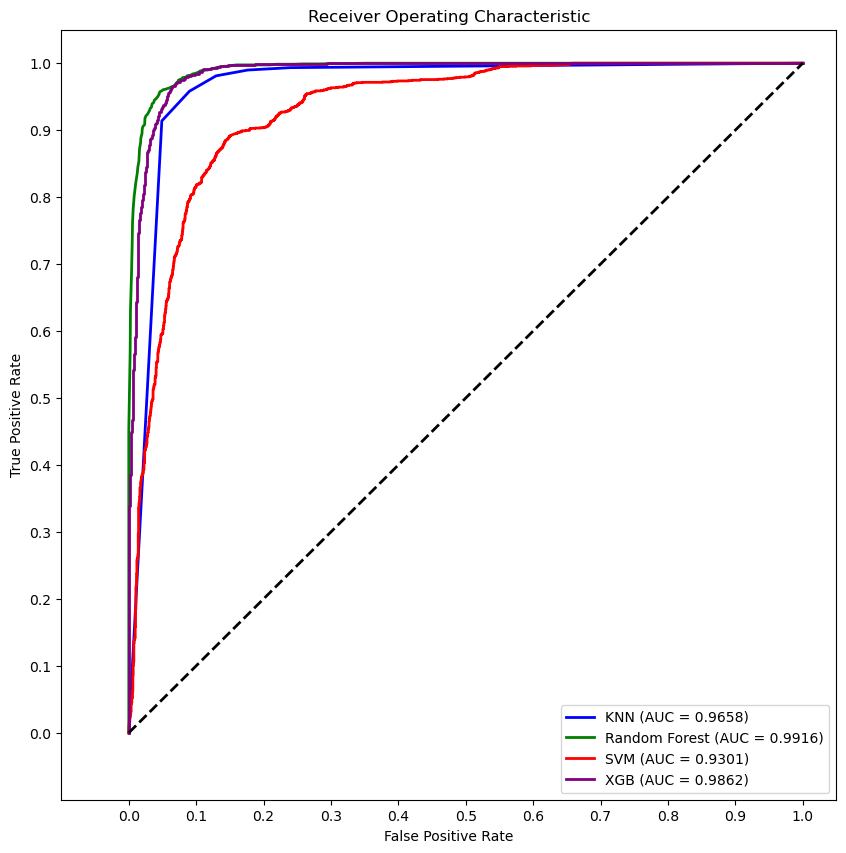

In [5]:
#KNN
KNNclf = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
KNNclf.fit(x_train, y_train.values.ravel())
y_score_KNN = KNNclf.predict_proba(x_test)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_score_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

#Random Forest
RFclf = RandomForestClassifier(n_estimators = 100)  
RFclf.fit(x_train, y_train.values.ravel())
y_score_RF = RFclf.predict_proba(x_test)[:, 1]
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_score_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

#SVM
SVCModel= SVC(probability=True)
SVCModel.fit(x_train, y_train.values.ravel())
y_score_SVM = SVCModel.predict_proba(x_test)[:, 1]
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, y_score_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

#XGB
XGBModel = XGBClassifier()
XGBModel.fit(x_train, y_train.values.ravel())
y_score_XGB = XGBModel.predict_proba(x_test)[:, 1]
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_score_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

# Plot ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr_KNN, tpr_KNN, color='blue', lw=2, label='KNN (AUC = %0.4f)' % roc_auc_KNN)
plt.plot(fpr_RF, tpr_RF, color='green', lw=2, label='Random Forest (AUC = %0.4f)' % roc_auc_RF)
plt.plot(fpr_SVM, tpr_SVM, color='red', lw=2, label='SVM (AUC = %0.4f)' % roc_auc_SVM)
plt.plot(fpr_XGB, tpr_XGB, color='purple', lw=2, label='XGB (AUC = %0.4f)' % roc_auc_XGB)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.1, 1.05])
plt.ylim([-0.1, 1.05])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<br> <br> <br>

### Now we will use SHAP to identify the most important features used in the best model, which is Random Forest
<br> <br> <br>


# What is SHAP?<br>
 SHAP can provide a global view of the model's feature importance by calculating the contribution of each feature to the model's output for all data points. Since we have many features, SHAP will help in determining which feature has the highest weightage.


<br> <br> <br> 

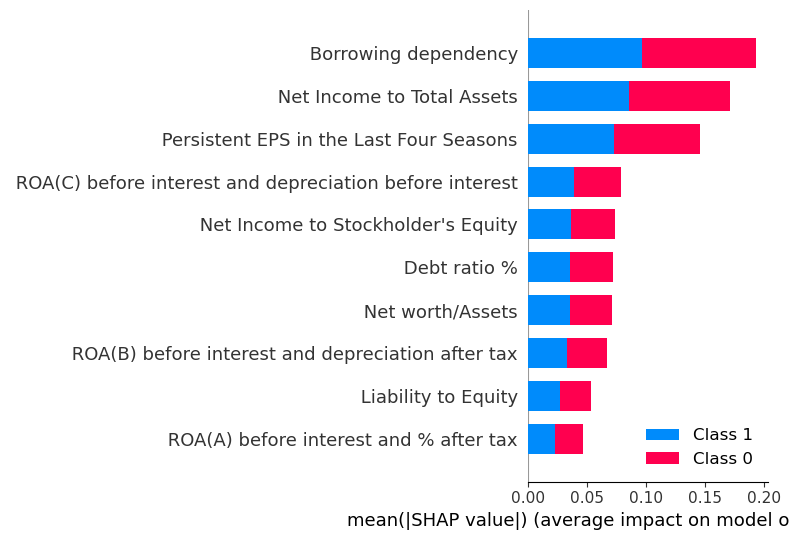

In [6]:
explainer = shap.TreeExplainer(RFclf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

<br>
From the summary plot, we can see that in contrary to our comparison of our features using correlation coefficient, it seems that the biggest determinant in Bankruptcy is actually *Borrowing dependency*. Now, we'll try to plot and see whether there is another depth to borrowing dependency.